In [63]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

from sklearn import datasets
iris = datasets.load_iris()

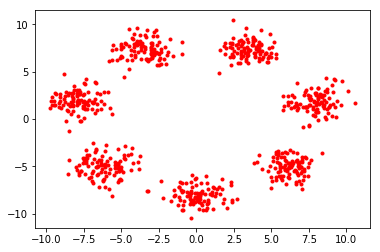

In [19]:
b = 7
C = 7
alpha = 2*math.pi/C
# tw. cosinusów
r = math.sqrt(b**2/(2*(1-math.cos(alpha))))
A = np.zeros((2,C*100))
for i in range(C):
    a = r * math.cos((math.pi/2 + 2*math.pi*i) / C)
    b = r * math.sin((math.pi/2 + 2*math.pi*i) / C)
    for j in range(100):
        A[0,j+(100*i)]= np.random.randn() + a
        A[1,j+(100*i)]= np.random.randn() + b
plt.plot(A[0,:], A[1,:], "r.")
plt.show()

In [189]:
def kmeans(D,K):
    d = D.shape[0]
    N = D.shape[1]
    M = np.zeros((N,K))
    r = np.zeros((d,K))
    g = np.zeros(N) # która grupa
    ind=[]
    for k in range(K):
        t = math.floor(np.random.rand()*(N-1))
        if(t not in ind):
            r[:,k] = D[:,t]
            ind.append(t)

    X = np.matlib.repmat(sum(D**2).reshape(N,1),1,K) # wektory powtórzone kolumnowo
    #Y = np.matlib.repmat(sum(r**2),N,1) # wektory powtórzone wierszowo
    #XY = -2 * np.dot(D.T,r)
    #euc = X + Y + XY

    cond = True
    while(cond):
        cond = False
        Y = np.matlib.repmat(sum(r**2),N,1) # wektory powtórzone wierszowo
        XY = -2 * np.dot(D.T,r)
        euc = X + Y + XY
        for i in range(N):
            minimum = euc[i,0]
            pos = 0
            for k in range(1,K):
                if(euc[i,k] < minimum):
                    pos = k
                    minimum = euc[i,k]
            if(M[i,pos] == 0):
                M[i,:]=np.zeros(K)
                M[i,pos] = 1
                g[i] = pos
                cond = True
        
        r = np.dot(D,M)/sum(M)
    return g, r


In [216]:
#kmeans(iris.data.T,3)
iris.data.T

array([[ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
         4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
         4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
         5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
         5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
         5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
         5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
         6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
         5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
         5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
         6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
         5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
         6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
         6.8,  6.7,  6.7,  6.3,  6.5, 

In [218]:
N = 5000

def generuj(N,d,K,P,M,S):
    res = []
    n = 0
    params = zip(P,M,S)
    for p,m,s in params:
        A = np.linalg.cholesky(s)
        for i in np.arange(p*N):
            z = []
            for j in range(d):
                z.append(np.random.randn())
                Z = np.array(z)
            X = np.dot(A,Z) + m
            res.append((n,X))
        n += 1
    return res

#a

d = 2
K = 5
p = np.ones(K) * 1/K
mi = [np.ones(d) * 3. * x for x in np.arange(1,K+1)]
S = [np.eye(d)]*K
a = generuj(5000,d,K,p,mi,S)

#b
S[2] = np.array([[3,0],[0,1]])
b = generuj(5000,d,K,p,mi,S)

#c
S[0] = np.array([[3,1],[1,1]])
c = generuj(5000,d,K,p,mi,S)

#d
p_d = [0.2, 0.1, 0.3, 0.1, 0.3]
d = generuj(5000,d,K,p_d,mi,S)

#e
d = 3
K = 5
p = np.ones(K) * 1/K
mi = [np.ones(d) * 3. * x for x in np.arange(1,K+1)]
S = [np.eye(d)]*K
S[2] = np.array([[3,1,0],[1,1,0],[0,0,1]])
e = generuj(5000,d,K,p,mi,S)

#f
d = 100
K = 10
p = np.ones(K) * 1/K
mi = [np.ones(d) * 3. * x for x in np.arange(1,K+1)]
S = [np.eye(d)]*K
f = generuj(5000,d,K,p,mi,S)
a

[(0, array([ 3.07103811,  3.07005363])),
 (0, array([ 4.10736469,  4.06339692])),
 (0, array([ 4.7525878 ,  2.55124279])),
 (0, array([ 5.42948272,  3.87593353])),
 (0, array([ 2.79767194,  3.11348554])),
 (0, array([ 2.68534976,  2.80958836])),
 (0, array([ 3.95642587,  5.06677191])),
 (0, array([ 2.75618663,  2.21248656])),
 (0, array([ 4.11825407,  2.89119846])),
 (0, array([ 2.63475697,  3.72121001])),
 (0, array([ 2.67909546,  3.4756101 ])),
 (0, array([ 0.75473533,  3.07940241])),
 (0, array([ 2.49792198,  4.34983717])),
 (0, array([ 2.61901492,  2.66159627])),
 (0, array([ 3.69763147,  4.18925903])),
 (0, array([ 2.01094049,  1.75755833])),
 (0, array([ 2.45759431,  4.22134645])),
 (0, array([ 2.95706978,  4.18549268])),
 (0, array([ 2.60390319,  3.07560331])),
 (0, array([ 2.76051134,  3.10805771])),
 (0, array([ 2.80327991,  1.96853417])),
 (0, array([ 1.47101838,  4.21796758])),
 (0, array([ 2.02677407,  2.06653484])),
 (0, array([ 2.71132987,  2.94605723])),
 (0, array([ 2.0